In [0]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import poisson
from numba import jit

# ANS-2

In [0]:
# Grid length 
k=5           
gamma=0.9

# Correct the coordinates for points outside grid
def correct(x,i):
    return min(max(0,x+i),k-1)

# Get corrected neighbours given a coordinate
def get_neighbour(x,y):
    for i,j in [(-1,0),(0,1),(1,0),(0,-1)]:
        yield correct(x,i), correct(y,j)

In [0]:
pi=0.25*np.ones((4,1))
r=np.zeros((k,k,4))        # Reward matrix (r,c,a) reward for each action (up,right,down,left) at each state 
P=np.zeros((k,k,k,k,4))    # Transition matrix (r,c,r',c',a) probability of taking action 'a' in state (r,c) and getting at state (r',c')  

# Visit all states
for i,j in itertools.product(range(k),range(k)):
    for action,nei in enumerate(get_neighbour(i,j)):
        if nei==(i,j):
            r[i,j,action]=-1      # Assign -1 if coordinates are same
        P[i,j,nei[0],nei[1],action]=1

# Set reward matrix 
r[0,1]=10
r[0,3]=5
r=r.reshape(k*k,4)

# Set transistion matrix
P[0,1]=0
P[0,1,4,1]=1
P[0,3]=0
P[0,3,2,3]=1
P=P.reshape(k*k,k*k,4)

In [0]:
# Multiply with policy
r=r.dot(pi)
P=P.dot(pi).squeeze(-1)

# Find V by solving system of linear equations
V=np.linalg.pinv(np.eye(k*k)-gamma*P).dot(r)
V=V.reshape(k,k).round(1)   
V

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.3,  1.9,  0.5],
       [ 0.1,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.4, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -2. ]])

# ANS-4

In [0]:
# Grid length 
k=5           
gamma=0.9

# Correct the coordinates for points outside grid
def correct(x,i):
    return min(max(0,x+i),k-1)

# Get corrected neighbours given a coordinate for every tion
def get_neighbour(x,y):
    if x==0 and y==1:
        for _ in range(4):
            yield (4,1)
    elif x==0 and y==3:
        for _ in range(4):
            yield (2,3)
    else:
        for i,j in [(-1,0),(0,1),(1,0),(0,-1)]:
            yield correct(x,i), correct(y,j)

In [0]:
# Get reward and transition matrix
R=np.zeros((k,k,4))        # reward for each action (up,right,down,left) at each state 
P=np.zeros((k,k,k,k,4))    # (r,c,r',c',a) Probability of taking action 'a' in state (r,c) and getting at state (r',c')  

# Check all states
for i,j in itertools.product(range(k),range(k)):
    for action,nei in enumerate(get_neighbour(i,j)):
        if nei==(i,j):
            R[i,j,action]=-1    # Assign -1 if coordinates are same
        P[i,j,nei[0],nei[1],action]=1

R[0,1]=10
R[0,3]=5

V=np.zeros((k,k))            # Initialize value function with zeros
Pi=0.25*np.ones((k,k,4))     # Initialize policy with random actions

epsilon=1e-9         # Tolerance of Policy evaluation

In [0]:
# Policy Evaluation
def Policy_evaluation():
    while True:
        Delta=0
        # Visit all states
        for i,j in itertools.product(range(k),range(k)):
            tempv=V[i,j]
            summation=0
            for action,neig in enumerate(get_neighbour(i,j)):
                summation+=Pi[i,j,action]*(R[i,j,action]+gamma*V[neig[0],neig[1]])
            V[i,j]=summation
            Delta=max(Delta,abs(V[i,j]-tempv))
        if Delta<epsilon:
            break

In [0]:
# Policy Improvement
def Policy_improvement():
    policy_stable=True
    for i,j in itertools.product(range(k),range(k)):
        old_action=np.argmax(Pi[i,j])
        values=[]
        for action,neig in enumerate(get_neighbour(i,j)):
            values.append(R[i,j,action]+gamma*V[neig[0],neig[1]])
        best_actions=np.where(values==np.max(values))[0]    # Check for multiple best values
        Pi[i,j]=0
        Pi[i,j,best_actions]=1/len(best_actions)    # Assign equal probability to all best actions
        if old_action!=np.argmax(Pi[i,j]):
            policy_stable=False
    return policy_stable

In [0]:
while True:
    Policy_evaluation()
    PI=Policy_improvement()
    if PI:
        break

In [0]:
V.round(1)   # Value function

array([[22. , 24.4, 22. , 19.4, 17.5],
       [19.8, 22. , 19.8, 17.8, 16. ],
       [17.8, 19.8, 17.8, 16. , 14.4],
       [16. , 17.8, 16. , 14.4, 13. ],
       [14.4, 16. , 14.4, 13. , 11.7]])

In [0]:
# Prints best policy
for i in range(k):
    for j in range(k):
        print(np.where(Pi[i,j]==np.max(Pi[i,j]))[0].tolist(),end='          ')
    print()

[1]          [0, 1, 2, 3]          [3]          [0, 1, 2, 3]          [3]          
[0, 1]          [0]          [0, 3]          [3]          [3]          
[0, 1]          [0]          [0, 3]          [0, 3]          [0, 3]          
[0, 1]          [0]          [0, 3]          [0, 3]          [0, 3]          
[0, 1]          [0]          [0, 3]          [0, 3]          [0, 3]          


# ANS-6


In [0]:
# Grid length 
k=4
gamma=1

action_list={0:(-1,0), 1:(0,1), 2:(1,0), 3:(0,-1)}

# Correct the coordinates for points outside grid
def correct(x,i):
    return min(max(0,x+i),k-1)

# Get corrected neighbours for each action given a coordinate 
def get_neighbours(x,y):
    for i in range(4):
        yield get_neighbour(x,y,i)

# Get corrected neighbour given a coordinate and an action
def get_neighbour(x,y,a):
    move=action_list[a]
    return correct(x,move[0]), correct(y,move[1])

# Choose an action greedily according to pi for the given coordinate (return all best actions if multiple actions)
def choose_action(x,y):
    return np.where(pi[x,y]==np.max(pi[x,y]))[0]

# Check if (x,y) are terminal state
def is_terminal(x,y):
    return (x==0 and y==0) or (x==(k-1) and y==(k-1))

**Policy Iteration**

In [0]:
# Get reward matrix
R=np.zeros((k,k,4))        # reward for each action (up,right,down,left) at each state 

for i,j in itertools.product(range(k),range(k)):
    if is_terminal(i,j):
        continue
    for action,nei in enumerate(get_neighbours(i,j)):
            R[i,j,action]=-1    # Assign -1 for each transition

V=np.zeros((k,k))            # Initialize value function with zeros
pi=0.25*np.ones((k,k,4))     # Initialize policy with random actions

epsilon=1e-9                 # Tolerance of Policy evaluation

In [0]:
# Policy Evaluation
delta_history=[]
def Policy_evaluation():
    while True:
        Delta=0
        for i,j in itertools.product(range(k),range(k)):    # Check all non-terminal states
            if is_terminal(i,j):
                continue
            tempv=V[i,j]
            summation=0
            for action,neig in enumerate(get_neighbours(i,j)):
                summation+=pi[i,j,action]*(R[i,j,action]+gamma*V[neig[0],neig[1]])
            V[i,j]=summation
            Delta=max(Delta,abs(V[i,j]-tempv))
        delta_history.append(Delta)
        if Delta<epsilon:
            break

In [0]:
stability_hist=[]
# Policy Improvement
def Policy_improvement():
    policy_stable=True
    for i,j in itertools.product(range(k),range(k)):
        n_stable=k*k-2         # Calculate number of stable states
        if is_terminal(i,j):
            continue
        old_action=choose_action(i,j)
        values=[]
        for action,neig in enumerate(get_neighbours(i,j)):
            values.append(R[i,j,action]+gamma*V[neig[0],neig[1]])
        best_actions=np.where(values==np.max(values))[0]
        pi[i,j]=0
        pi[i,j,best_actions]=1/len(best_actions)    # Assign equal probability to all best actions

        # Fixes 4.4 bug by comparing best actions with previous actions instead of a single action
        if not np.array_equal(old_action,best_actions):       
            policy_stable=False
            n_stable-=1
        stability_hist.append(n_stable)
    return policy_stable

In [302]:
c=0
while True:
    c+=1
    Policy_evaluation()
    PI=Policy_improvement()
    if PI:
        break

print("Number of steps taken to converge:",c)

Number of steps taken to converge: 3


In [303]:
V.round(1)

array([[ 0., -1., -2., -3.],
       [-1., -2., -3., -2.],
       [-2., -3., -2., -1.],
       [-3., -2., -1.,  0.]])

In [304]:
for i in range(k):
    for j in range(k):
        print(np.where(pi[i][j]==np.max(pi[i][j]))[0].tolist(),end='     ')
    print()

[0, 1, 2, 3]     [3]     [3]     [2, 3]     
[0]     [0, 3]     [0, 1, 2, 3]     [2]     
[0]     [0, 1, 2, 3]     [1, 2]     [2]     
[0, 1]     [1]     [1]     [0, 1, 2, 3]     


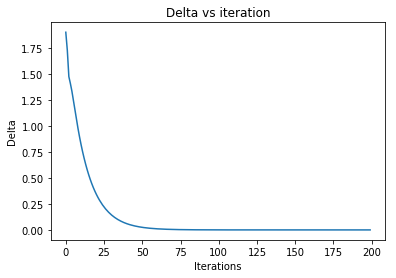

In [305]:
plt.plot(delta_history[:200])
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title('Delta vs iteration')
plt.show()

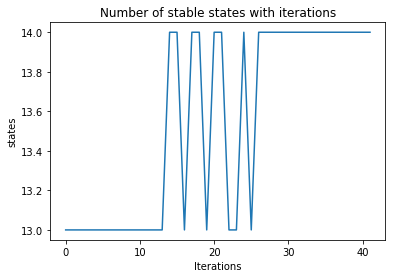

In [307]:
plt.plot(stability_hist)
plt.xlabel('Iterations')
plt.ylabel('states')
plt.title('Number of stable states with iterations')
plt.show()

**Value Iteration**

In [0]:
# Get reward matrix
R=np.zeros((k,k,4))        # reward for each action (up,right,down,left) at each state 

for i,j in itertools.product(range(k),range(k)):
    if is_terminal(i,j):
        continue
    for action,nei in enumerate(get_neighbours(i,j)):
            R[i,j,action]=-1    # Assign -1 for each transition

V=np.zeros((k,k))            # Initialize value function with zeros
pi=np.zeros((k,k)).tolist()     # Initialize policy with random actions

epsilon=1e-9                 # Tolerance of Value Iteration

In [0]:
delta_history=[]
# Policy Evaluation
def Policy_evaluation():
    while True:
        Delta=0
        for i,j in itertools.product(range(k),range(k)):    # Check all non-terminal states
            if is_terminal(i,j):
                continue
            tempv=V[i,j]
            values=[]
            for action,neig in enumerate(get_neighbours(i,j)):
                values.append(R[i,j,action]+gamma*V[neig[0],neig[1]])
            V[i,j]=max(values)
            Delta=max(Delta,abs(V[i,j]-tempv))
        delta_history.append(Delta)    # Append the largest Delta of all states
        if Delta<epsilon:
            break

In [0]:
# Value Iteration
Policy_evaluation()

# Choose optimal policy greedily
for i,j in itertools.product(range(k),range(k)):    # Check all non-terminal states
    if is_terminal(i,j):
        continue
    value=[]
    for action,neig in enumerate(get_neighbours(i,j)):
        value.append(R[i,j,action]+gamma*V[neig[0],neig[1]])
    pi[i][j]=np.where(np.array(value)==np.max(value))[0].tolist()

In [226]:
V.round(1)

array([[ 0., -1., -2., -3.],
       [-1., -2., -3., -2.],
       [-2., -3., -2., -1.],
       [-3., -2., -1.,  0.]])

In [227]:
# Print policy
for i in range(k):
    for j in range(k):
        print(pi[i][j],end='     ')
    print()

0.0     [3]     [3]     [2, 3]     
[0]     [0, 3]     [0, 1, 2, 3]     [2]     
[0]     [0, 1, 2, 3]     [1, 2]     [2]     
[0, 1]     [1]     [1]     0.0     


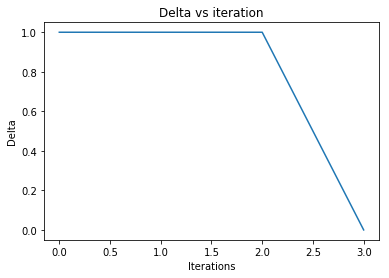

In [230]:
plt.plot(delta_history)
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title('Delta vs iteration')
plt.show()

# Jack's car rental problem

In [0]:
# Number of states possible for each location 
k=21  
gamma=0.9
epsilon=1e-6                 # Tolerance of Policy evaluation
# Total number of actions possible, move i cars from location 1 to location 2; -5<=i<=5
num_actions=11      

# Get probability of x from poisson of mean lamb
def poisson_prob(x,lamb=3):
    return poisson.pmf(k=x,mu=lamb)

# Cache poisson pmf results
poisson3=np.empty(k)
poisson4=np.empty(k)
poisson2=np.empty(k)

for i in np.arange(k):
    poisson3[i]=poisson_prob(i,3)
    poisson4[i]=poisson_prob(i,4)
    poisson2[i]=poisson_prob(i,2)

In [0]:
# returns weighted reward for each possible state 
# state is a tuple of number of cars in each location 
# action is from -5 to 5
@jit(nopython=True)
def inner_sum(state,action,V):
    tot_reward=0

    # First do the action of moving cars; s=intermediate state
    # then calculate reward; -2 for moving each car
    s=[min(state[0]-action,20),min(state[1]+action,20)]
    tot_reward=-2*abs(action)

    # Extension 4.7
    if action>0:       # If we transfer car(s) from location 1 to 2, then deduct cost for 1 car which can be transfered by our friend 
        tot_reward+=2
    tot_reward-=4*((s[0]>10)+(s[1]>10))   # Add additional cost if cars>10 at any location

    # All possible ways to rent from each location
    for rent1 in np.arange(k//2+1):
        for rent2 in np.arange(k//2+1):
            prob_rent=poisson3[rent1]*poisson4[rent2]
            temps=max(s[0]-rent1,0),max(s[1]-rent2,0)
            r=((s[0]-temps[0])+(s[1]-temps[1]))*10               # reward=number of cars rented * 10

            # All possible ways to return to each location
            for return1 in np.arange(k//2+1):
                for return2 in np.arange(k//2+1):
                    prob_return=poisson3[return1]*poisson2[return2]
                    sp=min(temps[0]+return1,20),min(temps[1]+return2,20)
                    tot_reward+=prob_rent*prob_return*(r+gamma*V[sp[0],sp[1]])   # Mulitply both the probabilities

    return tot_reward

In [0]:
# Policy Evaluation
@jit(nopython=True)
def Policy_evaluation(V,pi):
    while True:
        Delta=0
        for i in np.arange(k):
            for j in np.arange(k):
                tempv=V[i,j]
                V[i,j]=inner_sum((i,j),pi[i,j],V)
                Delta=max(Delta,abs(V[i,j]-tempv))
        if Delta<epsilon:
            break

In [0]:
# Policy Improvement
@jit(nopython=True)
def Policy_improvement(V,pi):
    policy_stable=True
    for i in range(k):
        for j in range(k):
            old_action=pi[i,j]
            values=np.empty(num_actions)
            for action in range(-5,6):
                if ((0<=action) and (action<=i)) or ((0<=-action) and (-action<=j)):
                    values[action+5]=inner_sum((i,j),action,V)
                else:
                    values[action+5]=-np.inf
            pi[i,j]=np.argmax(values)-5
            if pi[i,j]!=old_action:
                policy_stable=False
    return policy_stable

In [197]:
%%time
c=0
V=np.zeros((k,k))        # Initialize state-value function with zeros
pi=np.zeros((k,k),dtype=np.int)      # Policy, initially 0 car moves from each location 

while True:
    c+=1
    Policy_evaluation(V,pi)
    PI=Policy_improvement(V,pi)
    print(c)
    if PI:
        break

print("Number of steps taken to converge:",c)

1
2
3
4
Number of steps taken to converge: 4
CPU times: user 19.7 s, sys: 31 ms, total: 19.7 s
Wall time: 19.7 s


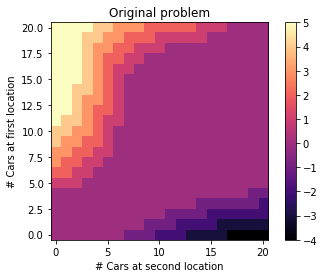

In [192]:
plt.imshow(pi,cmap='magma')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('# Cars at second location')
plt.ylabel('# Cars at first location')
plt.title('Original problem')
plt.show()

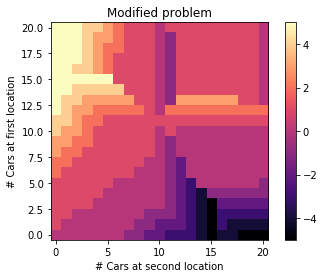

In [198]:
plt.imshow(pi,cmap='magma')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('# Cars at second location')
plt.ylabel('# Cars at first location')
plt.title('Modified problem')
plt.show()